In [2]:
import numpy as np
import matplotlib.pyplot as plt
from openTSNE import TSNE

In [12]:
class grid(object):
    def __init__(self,x_min,x_max,y_min,y_max,size):
        self.x_min=x_min
        self.x_max=x_max
        self.y_min=y_min
        self.y_max=y_max
        self.grid_size=size
        self.grids=self.create_grids()
        self.nonzero_grids=0
        
    def create_grids(self):
        x_len=np.ceil((self.x_max-self.x_min)/self.grid_size).astype(int)
        y_len=np.ceil((self.y_max-self.y_min)/self.grid_size).astype(int)
        return np.zeros((x_len,y_len), dtype=int)
    
    def adjust_grids(self,data):
        for i in data:
            if (i[0]>=self.x_min and i[0]<self.x_max) and (i[1]>=self.y_min and i[1]<self.y_max):
                x=int((i[0]-self.x_min)//self.grid_size)
                y=int((i[1]-self.x_min)//self.grid_size)
                if(self.grids[x][y]==0):
                    self.nonzero_grids+=1
                    self.grids[x][y]=1
    def APC(self):
        return self.nonzero_grids/self.grids.size

Using VAE

In [13]:
def sampling(u,logvar):
    stdev=np.exp(0.5*logvar)
    noise = np.random.standard_normal(stdev.shape)
    sample=u+(noise*stdev)
    return sample

In [14]:
def selecting(data):
    res=[]
    for i in range(len(data)):
        if(data[i].max() <= 0.002 and data[i].min() >= -0.002):
            res.append(data[i])
    return res

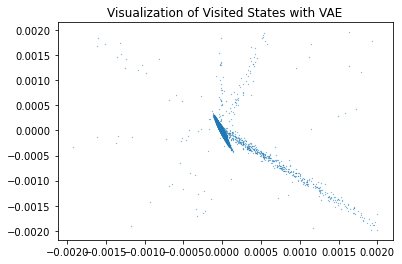

In [16]:
data_vae=np.load("vae_2d.npy")
data=np.transpose(data_vae, (1, 0, 2))
np.random.shuffle(data)
data_subset=data
#decode_data=[sampling(data_subset[i][0],data_subset[i][1]) for i in range(len(data_subset))]
decode_data=[data_subset[i][0] for i in range(len(data_subset))]
decode_data=selecting(decode_data)
x,y=[],[]
for i in range(len(decode_data)):
    x.append(decode_data[i][0])
    y.append(decode_data[i][1])
plt.scatter(x,y,s=0.05)
plt.title("Visualization of Visited States with VAE")
plt.show
plt.savefig("vae")

In [366]:
g=grid(-0.001,0.001,-0.001,0.001,0.00001)
g.adjust_grids(decode_data)
g.APC()

0.018725

Using T-SNE

In [3]:
states_data=np.load("TD3_Walker2d-v2_0_states.npy")
tsne = TSNE(n_components=2,perplexity=500)
states_data.shape

(300000, 17)

In [4]:
np.random.shuffle(states_data)
states_train=states_data[0:10000]
states_test=states_data[10000:]

In [5]:
embedding_train = tsne.fit(states_train)
states_embedded=np.transpose(embedding_train)

In [6]:
embedding_test = embedding_train.transform(states_test)

In [7]:
states_embedded=np.transpose(embedding_test)
states_embedded.shape

(2, 290000)

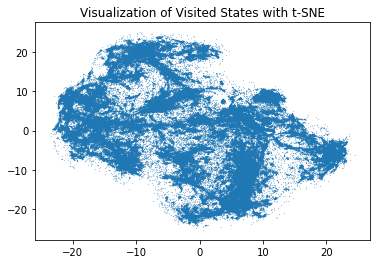

In [17]:
plt.scatter(states_embedded[0],states_embedded[1],s=0.02)
plt.title("Visualization of Visited States with t-SNE")
plt.show
plt.savefig("tsne")

In [348]:
g=grid(np.min(states_embedded[0]),np.max(states_embedded[0]),\
       np.min(states_embedded[1]),np.max(states_embedded[1]),0.5)
g.adjust_grids(embedding_test)
g.APC()

0.5770512286547272